# News Mood analysis

#Python script to perform a sentiment analysis of the Twitter activity of various news oulets

# Analysys

1. All agencies seem to have a fair mix of positive, neutral and negative sentiments in their tweets (based on the scatter plot). No significant pattern seen here. This seems consistent over multiple tries (data stored in time marked csv files).
2. On average though the majority seem negative, suggesting that there is a tendency towards more negative news.
3. After running the plots on multiple days, the compound average for any given agency fluctuates quite a bit, suggesting that the sentiment is significantly affect by the top news items covered by that agency.

In [14]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [15]:
# Target Search Term
target_agencies = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")
                   
# List to hold results
results_list = []

# Loop through all target users
for target in target_agencies:

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target, count=100, result_type="recent")

    # Loop through all tweets
    for tweet in public_tweets:
        twt_txt = tweet["text"]
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(twt_txt)

        # Add each tweet result to results list
        results_list.append({'account': target,
                            'text': twt_txt,
                            'date': tweet["created_at"],
                            'compound': results["compound"],
                            'positive': results["pos"],
                            'neutral': results["neu"],
                            'negative': results["neg"]})
        

In [16]:
#store results in a dataframe and save as csv file
date_time_str = datetime.now().strftime('%Y/%m/%d:%H.%M')
out_file = date_time_str.replace("/","_").replace(":","_").replace(".","_")
out_file = "nm_" + out_file + ".csv"
print(out_file)

nm_2018_04_27_17_36.csv


In [17]:
results_df = pd.DataFrame(results_list)
results_df.to_csv(out_file)
results_df.head()

,account,compound,date,negative,neutral,positive,text
0,@BBCWorld,-0.4019,Fri Apr 27 20:35:05 +0000 2018,0.231,0.769,0.000,Guinea politician 'enslaved girl in Texas for ...
1,@BBCWorld,0.7506,Fri Apr 27 19:08:26 +0000 2018,0.000,0.584,0.416,Korean summit: Welcoming Kim Jong-un with pomp...
2,@BBCWorld,0.2732,Fri Apr 27 19:05:36 +0000 2018,0.000,0.826,0.174,Trump visit: How previous presidents were gree...
3,@BBCWorld,-0.6705,Fri Apr 27 18:29:57 +0000 2018,0.333,0.667,0.000,Israel border clashes: Three Palestinians kill...
4,@BBCWorld,0.3612,Fri Apr 27 18:09:23 +0000 2018,0.168,0.531,0.301,Armenia's new president praises 'courage' of p...


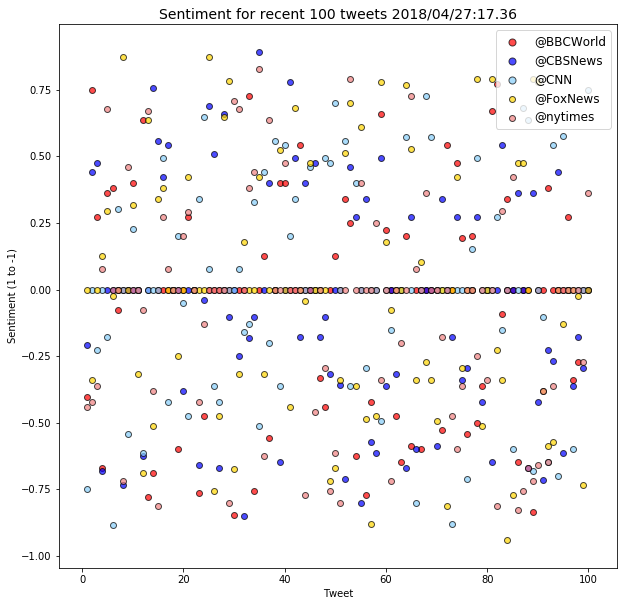

In [18]:
#plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
#using seaborn settings
#sns.set()

# set basics. news_colors should have same size as lables in same order prefered
fig, ax = plt.subplots(figsize=(10,10))
news_colors = ['red','blue','lightskyblue','gold','lightcoral']
labels = target_agencies

#plot each news agency's compound scores
for ix in np.arange(0, len(labels), 1):
    news_agency = target_agencies[ix]
    tweets = results_df[results_df['account'] == news_agency]
    scores = tweets['compound']
    x_axis = np.arange(1, len(scores)+1, 1)
    ax.scatter(x_axis, scores, marker="o", facecolors=news_colors[ix], edgecolors="black", alpha=0.7, label=labels[ix])

#set labels and legend
plt.title(f"Sentiment for recent 100 tweets {date_time_str}", fontsize=14)
plt.xlabel("Tweet")
plt.ylabel("Sentiment (1 to -1)")
lgnd = plt.legend(loc='upper right', prop={'size': 12})
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

#display plot
plt.show()
plt.clf()
plt.cla()
plt.close()

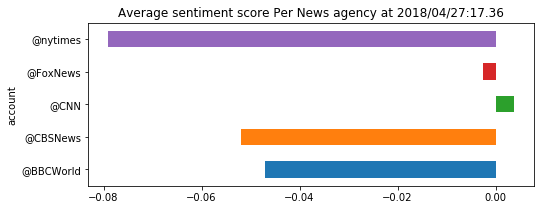

In [19]:
#plot average compound score for each agency

results_grouped_df = results_df.groupby('account')
avg_compound_df = results_grouped_df['compound'].mean()
avg_compound_df.plot(kind="barh", figsize=(8,3))
plt.title(f"Average sentiment score Per News agency at {date_time_str}")
plt.show()